# Predicting Warriors nba_team Win condition

In [35]:
from nba_api.stats.static import teams
from nba_api.stats.endpoints import leaguegamefinder as lgf
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
nba_teams=teams.get_teams()

In [5]:
nba_teams[:5]

[{'id': 1610612737,
  'full_name': 'Atlanta Hawks',
  'abbreviation': 'ATL',
  'nickname': 'Hawks',
  'city': 'Atlanta',
  'state': 'Atlanta',
  'year_founded': 1949},
 {'id': 1610612738,
  'full_name': 'Boston Celtics',
  'abbreviation': 'BOS',
  'nickname': 'Celtics',
  'city': 'Boston',
  'state': 'Massachusetts',
  'year_founded': 1946},
 {'id': 1610612739,
  'full_name': 'Cleveland Cavaliers',
  'abbreviation': 'CLE',
  'nickname': 'Cavaliers',
  'city': 'Cleveland',
  'state': 'Ohio',
  'year_founded': 1970},
 {'id': 1610612740,
  'full_name': 'New Orleans Pelicans',
  'abbreviation': 'NOP',
  'nickname': 'Pelicans',
  'city': 'New Orleans',
  'state': 'Louisiana',
  'year_founded': 2002},
 {'id': 1610612741,
  'full_name': 'Chicago Bulls',
  'abbreviation': 'CHI',
  'nickname': 'Bulls',
  'city': 'Chicago',
  'state': 'Illinois',
  'year_founded': 1966}]

In [8]:
def one_dict(list_dict):
    keys=list_dict[0].keys()
    out_dict={key:[] for key in keys}
    for dict_ in list_dict:
        for key,value in dict_.items():
            out_dict[key].append(value)
    return out_dict

In [10]:
dict_nba_teams=one_dict(nba_teams)

In [12]:
df_teams=pd.DataFrame(dict_nba_teams)

In [17]:
df_teams.head()

,id,full_name,abbreviation,nickname,city,state,year_founded
0,1610612737,Atlanta Hawks,ATL,Hawks,Atlanta,Atlanta,1949
1,1610612738,Boston Celtics,BOS,Celtics,Boston,Massachusetts,1946
2,1610612739,Cleveland Cavaliers,CLE,Cavaliers,Cleveland,Ohio,1970
3,1610612740,New Orleans Pelicans,NOP,Pelicans,New Orleans,Louisiana,2002
4,1610612741,Chicago Bulls,CHI,Bulls,Chicago,Illinois,1966


In [19]:
df_warriors=df_teams[df_teams['nickname']=='Warriors']
df_warriors

,id,full_name,abbreviation,nickname,city,state,year_founded
7,1610612744,Golden State Warriors,GSW,Warriors,Golden State,California,1946


In [20]:
id_warriors=df_warriors[['id']].values[0][0]

In [21]:
id_warriors

1610612744

In [27]:
gamefinder=lgf.LeagueGameFinder(team_id_nullable=id_warriors)

In [29]:
games=gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,12019,1610612744,GSW,Golden State Warriors,0011900006,2019-10-05,GSW vs. LAL,L,240,101,...,0.769,10.0,37.0,47.0,20,10,2,16,27,-22.0
1,22019,1610612744,GSW,Golden State Warriors,1521900066,2019-07-12,GSW vs. LAL,L,200,87,...,0.800,13.0,29.0,42.0,13,10,3,11,21,3.2
2,22019,1610612744,GSW,Golden State Warriors,1521900058,2019-07-10,GSW @ DEN,W,201,73,...,0.867,7.0,27.0,34.0,10,11,7,20,20,-8.0
3,22019,1610612744,GSW,Golden State Warriors,1521900039,2019-07-08,GSW @ LAL,W,200,88,...,0.621,8.0,29.0,37.0,21,10,4,13,22,8.0
4,22019,1610612744,GSW,Golden State Warriors,1521900020,2019-07-07,GSW vs. TOR,W,201,80,...,0.923,6.0,37.0,43.0,18,8,3,20,25,10.0


In [30]:
games_home=games[games['MATCHUP']=='GSW vs. LAL']
games_away=games[games['MATCHUP']=='GSW @ LAL']

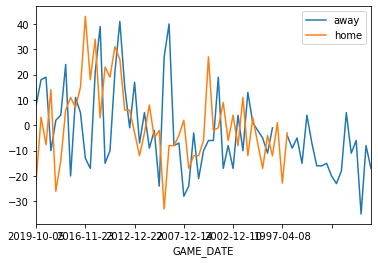

In [33]:
fig,ax=plt.subplots()
games_away.plot(x='GAME_DATE',y='PLUS_MINUS',ax=ax)
games_home.plot(x='GAME_DATE',y='PLUS_MINUS',ax=ax)
ax.legend(['away','home'])
plt.show()

## we see that the warriors played better at home